<a href="https://colab.research.google.com/github/BhaktiPradana/Project-NLP/blob/main/Project_NLP_Bhakti_Pradana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project NLP - LinkedIn Reviews**
- Nama: Bhakti Pradana Roesyadi
- Email: bhaktipradana24@gmail.com
- Id Dicoding:bhaktipradana

Install **Tensorflow**

In [ ]:
pip install tensorflow

Baca **Datasheet**

In [ ]:
import pandas as pd

file_path = 'LINKEDIN_REVIEWS.csv'

# membaca dataset dari file CSV
df = pd.read_csv(file_path)

# Menampilkan informasi dataset untuk memastikan bahwa sudah terbaca dengan benar
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322641 entries, 0 to 322640
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          322641 non-null  int64 
 1   review_id           322641 non-null  object
 2   pseudo_author_id    322641 non-null  object
 3   author_name         322641 non-null  object
 4   review_text         320964 non-null  object
 5   review_rating       322641 non-null  int64 
 6   review_likes        322641 non-null  int64 
 7   author_app_version  255635 non-null  object
 8   review_timestamp    322641 non-null  object
dtypes: int64(3), object(6)
memory usage: 22.2+ MB
None


# **Melatih Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# Baca dataset
file_path = 'LINKEDIN_REVIEWS.csv'
df = pd.read_csv(file_path)

# Handling missing values in "review_text"
df['review_text'].fillna('', inplace=True)

# Konversi rating menjadi sentimen
df['sentiment'] = df['review_rating'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))

# Bagi dataset menjadi fitur dan label
X = df['review_text'].values
y = df['sentiment'].values

# Bagi dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenisasi teks
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Konversi teks menjadi sequence
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequence agar memiliki panjang yang sama
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Konversi label sentimen menjadi nilai integer
sentiment_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
y_train = np.array([sentiment_mapping[label] for label in y_train])
y_test = np.array([sentiment_mapping[label] for label in y_test])

# Membangun model LSTM
embedding_dim = 16
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(units=50),
    Dense(units=3, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Pelatihan model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
6453/6453 [==============================] - 73s 11ms/step - loss: 0.7291 - accuracy: 0.7355 - val_loss: 0.7292 - val_accuracy: 0.7365
Epoch 2/5
6453/6453 [==============================] - 48s 7ms/step - loss: 0.6903 - accuracy: 0.7362 - val_loss: 0.6020 - val_accuracy: 0.7844
Epoch 3/5
6453/6453 [==============================] - 48s 7ms/step - loss: 0.6598 - accuracy: 0.7482 - val_loss: 0.6173 - val_accuracy: 0.7642
Epoch 4/5
6453/6453 [==============================] - 48s 7ms/step - loss: 0.6256 - accuracy: 0.7525 - val_loss: 0.5221 - val_accuracy: 0.8281
Epoch 5/5
6453/6453 [==============================] - 47s 7ms/step - loss: 0.4784 - accuracy: 0.8353 - val_loss: 0.4235 - val_accuracy: 0.8592


# **Evaluasi Model**

In [ ]:
# Evaluasi model pada set data pengujian
test_results = model.evaluate(X_test_pad, y_test)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

2017/2017 [==============================] - 8s 4ms/step - loss: 0.4298 - accuracy: 0.8568
Test Loss: 0.4297686517238617
Test Accuracy: 0.8568240404129028


# **Prediksi Model**

In [ ]:
# Prediksi pada set data pengujian
test_predictions = model.predict(X_test_pad)

2017/2017 [==============================] - 7s 3ms/step


In [ ]:
# Menampilkan beberapa hasil prediksi pada set data pengujian
for i in range(5):
    print("Actual Sentiment:", y_test[i], "Predicted Sentiment:", np.argmax(test_predictions[i]))

Actual Sentiment: 2 Predicted Sentiment: 2
Actual Sentiment: 2 Predicted Sentiment: 2
Actual Sentiment: 2 Predicted Sentiment: 2
Actual Sentiment: 2 Predicted Sentiment: 2
Actual Sentiment: 0 Predicted Sentiment: 2


# **Visualisasi Hasil**

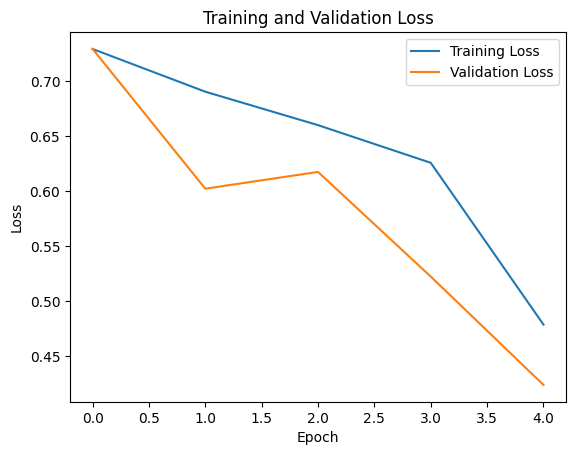

In [ ]:
# Visualisasi grafik loss dan akurasi
# Plot grafik loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

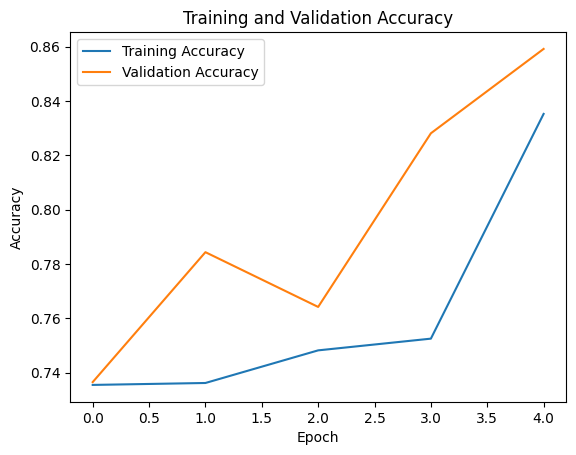

In [ ]:
# Plot grafik akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()